In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.chdir("../")

In [4]:
df = pd.read_csv('Data/raw_analyst_ratings.csv')

In [5]:
from scripts.Text_Data_Preprocessing import DataPreprocessor as tdp

stopwords_file_path = "src/stopwords.txt"
preprocessor = tdp(stopwords_file_path)
preprocessed_df = preprocessor.preprocess(df)


In [6]:
print(preprocessed_df.head())


                                               headline  \
0  0            Stocks That Hit 52-Week Highs On Friday   
1  1         Stocks That Hit 52-Week Highs On Wednesday   
2  2                      71 Biggest Movers From Friday   
3  3       46 Stocks Moving In Friday's Mid-Day Session   
4  4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  \
0 2020-06-05 10:30:54-04:00     A   
1 2020-06-03 10:45:20-04:00     A   
2 2020-05-26 04:30:07-04:00     A   
3 2020-05-22 12:45:06-04:00     A   
4 2020-05

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


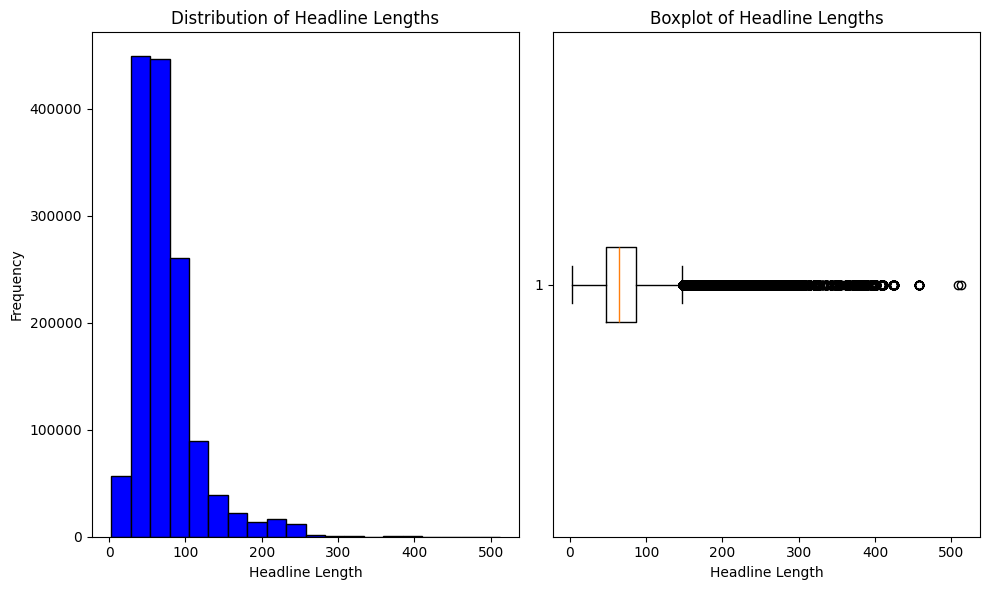

In [6]:
# Calculate headline lengths
from scripts.Calculate_basic_statistics import analyze_headline_lengths
stats = analyze_headline_lengths(preprocessed_df)


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


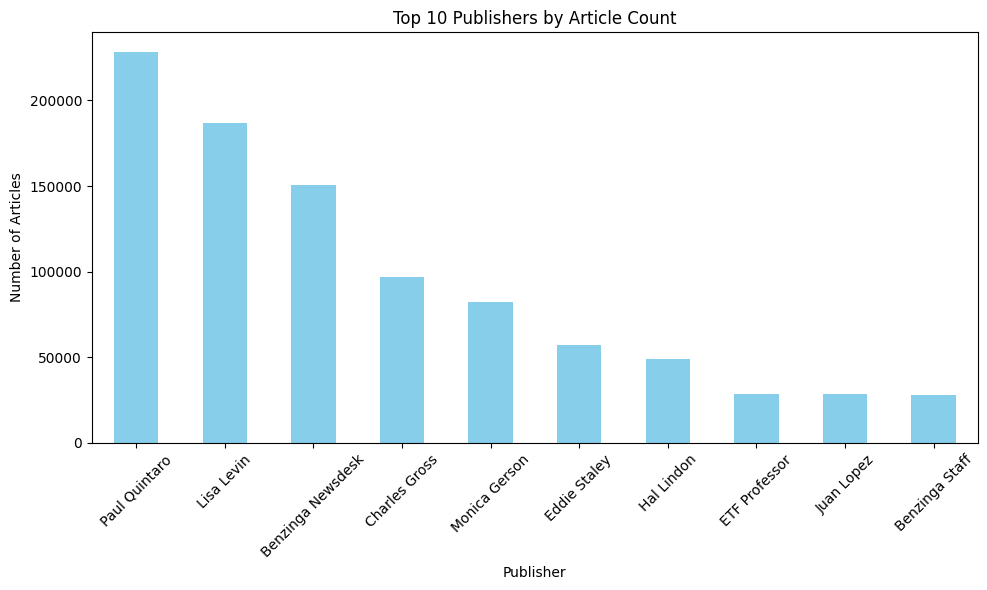

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [7]:
# Count articles per publisher
from scripts.articles_per_publisher import count_articles_per_publisher
count_articles_per_publisher(preprocessed_df)

c:\Users\windows 10\Desktop\Financial_Solutions\Financial_Solutions\scripts\Analyze_publication_dates.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df['date'].dt.to_period('M').value_counts().sort_index()


Daily Publication Counts:
date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
2011-05-03    3
2011-05-05    3
2011-05-06    3
2011-05-07    2
Name: count, dtype: int64


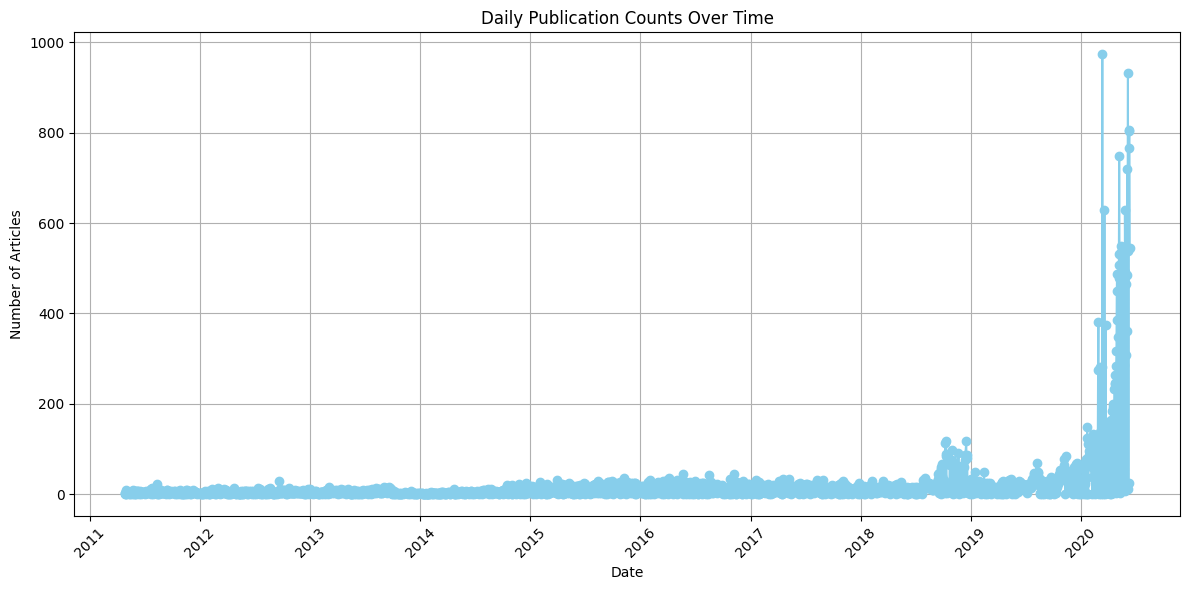

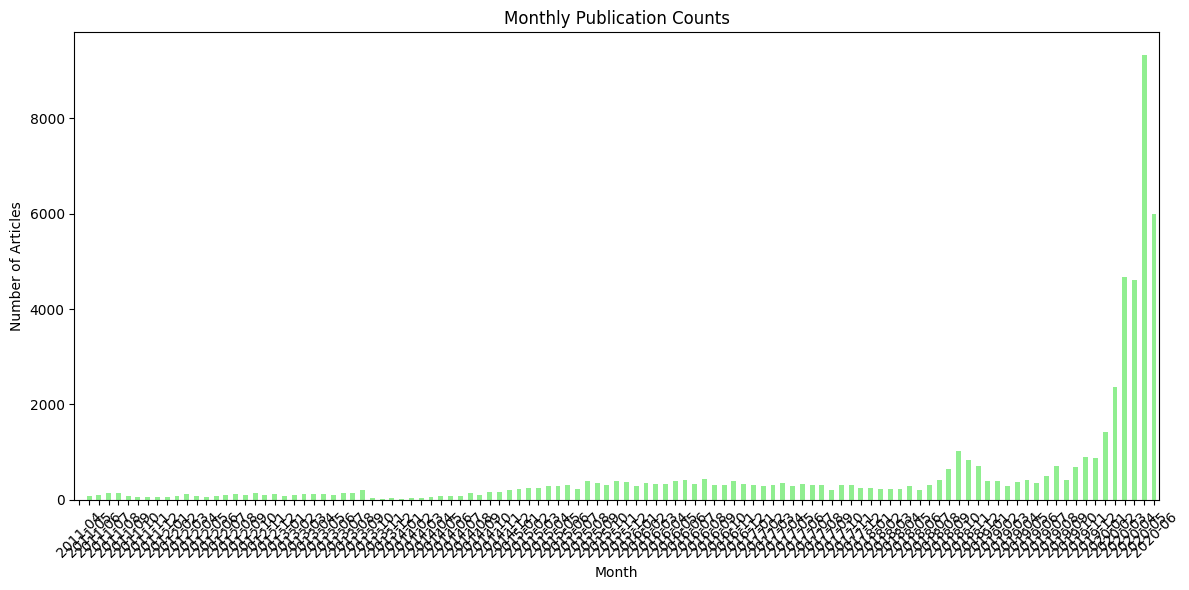

date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64

In [9]:
# Convert date to datetime
from scripts.Analyze_publication_dates import analyze_publication_dates
analyze_publication_dates(preprocessed_df)


                                                  headline  sentiment_score  \
0                  Stocks That Hit 52-Week Highs On Friday           0.0000   
1               Stocks That Hit 52-Week Highs On Wednesday           0.0000   
2                            71 Biggest Movers From Friday           0.0000   
3             46 Stocks Moving In Friday's Mid-Day Session           0.0000   
4        B of A Securities Maintains Neutral on Agilent...           0.2960   
...                                                    ...              ...   
1407323             Top Narrow Based Indexes For August 29           0.2023   
1407324  Recap: Wednesday's Top Percentage Gainers and ...          -0.3818   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...           0.0000   
1407326  Oppenheimer Initiates China Zenix At Outperfor...           0.0000   
1407327  China Zenix Auto International Opens For Tradi...           0.0000   

        sentiment  
0         neutral  
1         n

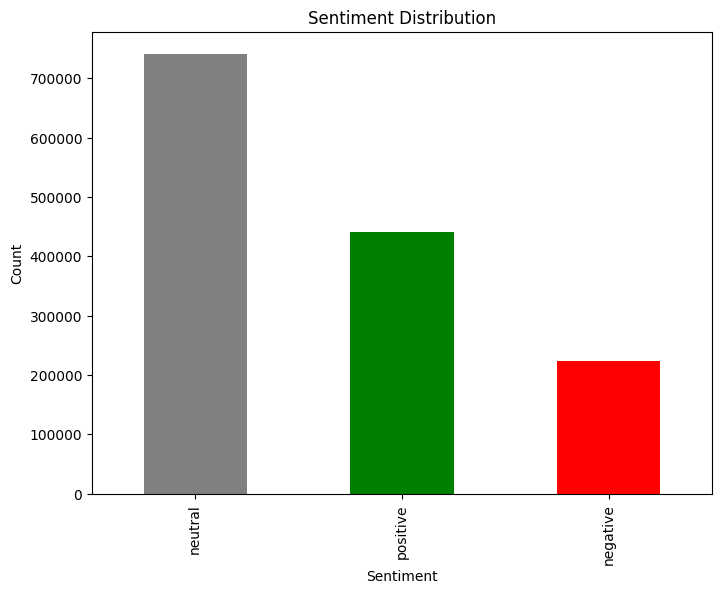

In [7]:
from scripts.headline_analysis import analyze_sentiment_vader

preprocessed_df = analyze_sentiment_vader(preprocessed_df, 'headline')


In [11]:
from scripts.visualize_common_words import visualize_common_words

preprocessed_df = visualize_common_words(preprocessed_df)


ValueError: not enough values to unpack (expected 2, got 1)

In [12]:
publisher_counts = preprocessed_df['publisher'].value_counts()

In [13]:
top_publishers = publisher_counts.head(10)

In [8]:
import re


publisher_counts = preprocessed_df['publisher'].value_counts()


top_publishers = publisher_counts.head(10)


preprocessed_df['publisher_type'] = preprocessed_df['publisher'].apply(lambda x: 'Individual' if '@' in x else 'Organization')



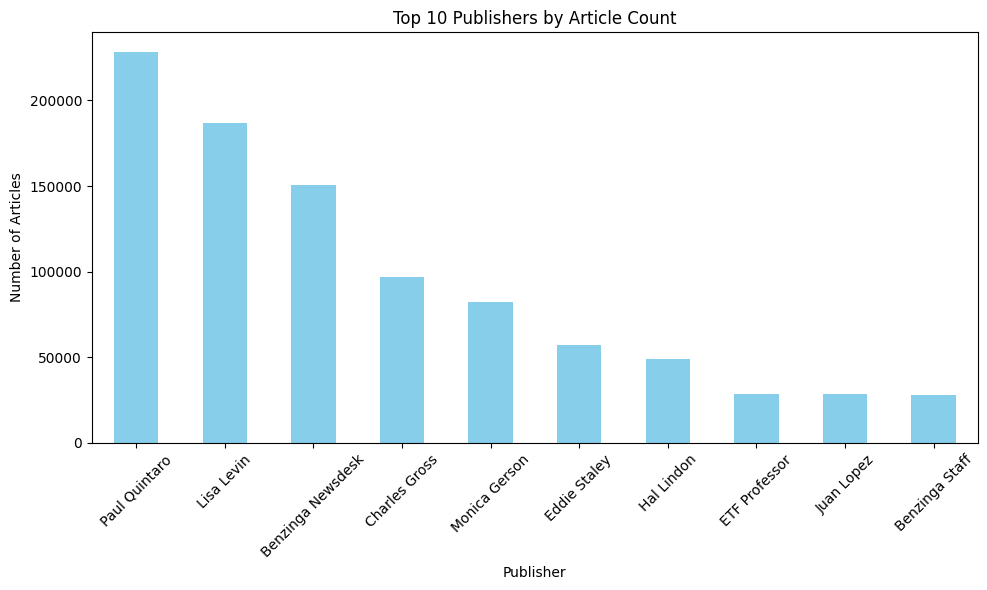

In [9]:
import matplotlib.pyplot as plt

print(top_publishers)
top_publishers.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import re

def extract_domain(email):
  """Extracts the domain from an email address."""
  match = re.match(r"^[^@]+@([^@]+)$", email)
  if match:
    return match.group(1)
  else:
    return None


preprocessed_df['publisher_domain'] = preprocessed_df['publisher'].apply(extract_domain)


domain_counts = preprocessed_df['publisher_domain'].value_counts()


print(domain_counts.head(10))

publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
